In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Read csv file with Gamma Analysis results
gamma_results = pd.read_csv("/home/suraj/Repositories/data/NKI/media_results/test_predictions/ssim/matrad_gamma_results.csv", index_col=0)

In [127]:
gamma_results.head()

,CBCT_passing_rate_1%_1mm,CBCT_passing_rate_1%_2mm,CBCT_passing_rate_2%_2mm,CBCT_passing_rate_3%_3mm,SCT_passing_rate_1%_1mm,SCT_passing_rate_1%_2mm,SCT_passing_rate_2%_2mm,SCT_passing_rate_3%_3mm,1%/1mm
0,66.831309,85.717629,94.665476,98.922138,79.334950,92.448776,97.561087,99.608677,66.831309
1,59.393611,78.664891,89.617108,97.236926,61.426823,79.610979,89.666977,96.810838,59.393611
2,50.344335,64.595856,73.453694,85.395584,57.610488,72.544279,81.913833,91.236173,50.344335
3,92.037674,96.598385,99.335239,99.971205,93.673608,97.247257,99.716855,99.995805,92.037674
4,78.417926,90.239116,95.767395,98.725077,84.108867,94.174296,98.708441,99.862775,78.417926


In [124]:
processed_gamma_results = pd.DataFrame()

gamma_rate_labels = [tag for tag in gamma_results.columns if 'rate' in tag]

processed_gamma_results["gamma"] = pd.concat([gamma_results[tag] for tag in gamma_rate_labels])
processed_gamma_results["config"] = pd.concat([pd.Series([tag.split("_", 3)[-1]] * len(gamma_results)) for tag in gamma_rate_labels])
processed_gamma_results["modality"]  = ["CBCT"] * (len(processed_gamma_results["config"])//2) + ["sCT"] * (len(processed_gamma_results["config"])//2)


In [125]:
processed_gamma_results.head()

,gamma,config,modality
0,66.831309,1%_1mm,CBCT
1,59.393611,1%_1mm,CBCT
2,50.344335,1%_1mm,CBCT
3,92.037674,1%_1mm,CBCT
4,78.417926,1%_1mm,CBCT


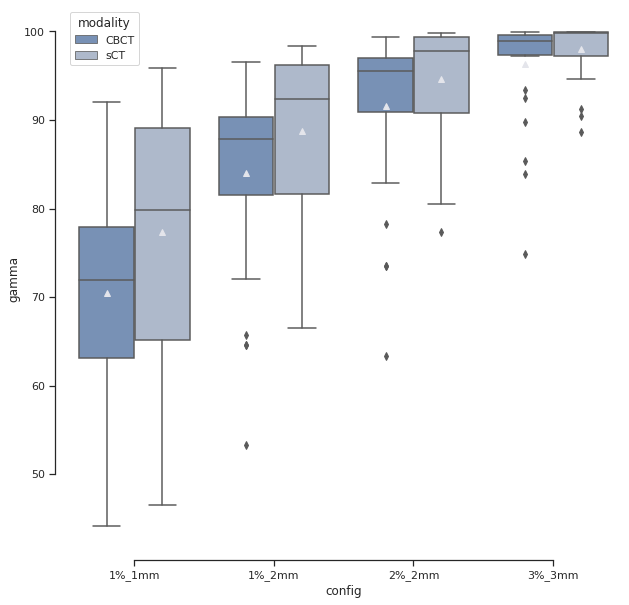

In [126]:
# Plot the gamma values in a box plot
f = plt.figure(figsize=(10, 10))
sns.set_theme(style="ticks", palette="vlag")
sns.boxplot(data=processed_gamma_results, x="config", y="gamma", hue="modality", showmeans=True)
# plt.xticks(rotation=45)
sns.despine(offset=10, trim=True)